In [23]:
# importing required Libraries
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


#Sample data

In [24]:
x = np.linspace(-0.5, 0.5, 100)[:, np.newaxis]

In [25]:
noise = np.random.normal(0, 0.02, x.shape) 

In [26]:
y = np.square(x) + noise

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(x, y)
print(regr.score(x, y))


2.9838694901695995e-05


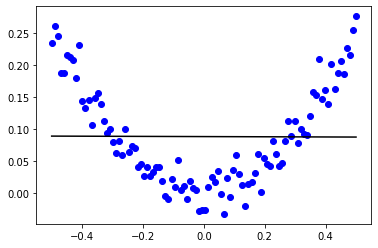

In [28]:
y_pred = regr.predict(x)
plt.scatter(x, y, color ='b')
plt.plot(x, y_pred, color ='k')
  
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination(r2_score): %.2f" % r2_score(y, y_pred))

Coefficients: 
 [[-0.00148458]]
Mean squared error: 0.01
Coefficient of determination(r2_score): 0.00


#Polynomial model

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

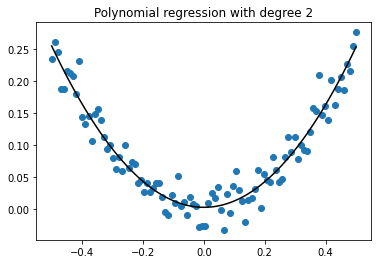

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.plot(x,polyreg.predict(x),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = polyreg.predict(x)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination(r2_score): %.2f" % r2_score(y, y_pred))

Coefficients: 
 [[-0.00148458]]
Mean squared error: 0.00
Coefficient of determination(r2_score): 0.93


# Three Layered Neural Network

In [33]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
random_state = 0) 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
from tensorflow import keras
from keras import layers

In [36]:
model = keras.Sequential()
model.add(layers.Dense(1))
model.add(layers.Dense(6,activation='relu',input_shape=x_train[0].shape))
model.add(layers.Dense(1))

In [37]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [38]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 8ms/step - loss: 0.0597
Epoch 2/10
3/3 [==============================] - 0s 9ms/step - loss: 0.0504
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0421
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0351
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 0.0288
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 0.0239
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 8/10
3/3 [==============================] - 0s 8ms/step - loss: 0.0154
Epoch 9/10
3/3 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.0100


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 6)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [40]:
y_pred = model.predict(x_test_scaled)
y_pred

1/1 [==============================] - 0s 99ms/step


array([[ 0.07523634],
       [ 0.31203297],
       [ 0.2089796 ],
       [-0.02519862],
       [ 0.19237009],
       [ 0.38818204],
       [ 0.1309627 ],
       [ 0.17061323],
       [-0.03607707],
       [ 0.40993893],
       [-0.0469555 ],
       [ 0.37730357],
       [ 0.22500536],
       [ 0.14768064],
       [ 0.18111643],
       [ 0.05294584],
       [ 0.09752691],
       [ 0.08638164],
       [ 0.03654543],
       [ 0.17554379]], dtype=float32)

In [41]:
from sklearn.metrics import mean_squared_error
# For y_pred1
mean_squared_error(y_pred,y_test)

0.011350828764137701